In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 7)

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['data.csv']


In [16]:
data=pd.read_csv('../input/data.csv',encoding = "ISO-8859-1")
data.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
stn_code                       291665 non-null object
sampling_date                  435739 non-null object
state                          435742 non-null object
location                       435739 non-null object
agency                         286261 non-null object
type                           430349 non-null object
so2                            401096 non-null float64
no2                            419509 non-null float64
rspm                           395520 non-null float64
spm                            198355 non-null float64
location_monitoring_station    408251 non-null object
pm2_5                          9314 non-null float64
date                           435735 non-null object
dtypes: float64(5), object(8)
memory usage: 43.2+ MB


In [21]:
data['rspm'].fillna((data['rspm'].mean()), inplace=True)
data['spm'].fillna((data['spm'].mean()), inplace=True)
data['pm2_5'].fillna((data['pm2_5'].mean()), inplace=True)

In [22]:
replacements = {
   'state': {
      r'Uttaranchal': 'Uttarakhand', 
   }
}

data.replace(replacements, regex=True, inplace=True)

**Most Polluted State in India**

In [23]:
data['Pollution Level']=(data['so2']+data['no2']+data['rspm']+data['spm']+data['pm2_5'])/5

****TOP 10 Most polluted city in India**

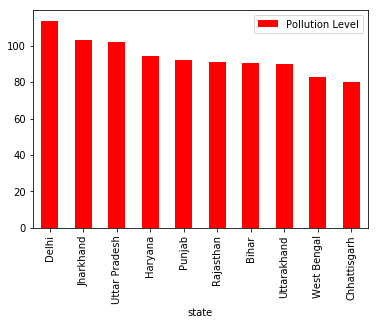

In [25]:
data[['Pollution Level','state']].groupby(["state"]).median().sort_values(by='Pollution Level',ascending=False).head(10).plot.bar(color='r')
plt.show()

**Top 10 Polluted city in India**

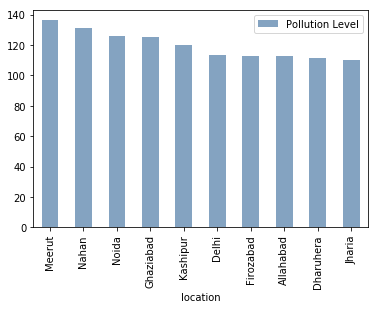

In [39]:
data[['Pollution Level','location']].groupby(["location"]).median().sort_values(by='Pollution Level',ascending=False).head(10).plot.bar(color=(0.2, 0.4, 0.6, 0.6))
plt.show()

**Type areas which are more polluted**

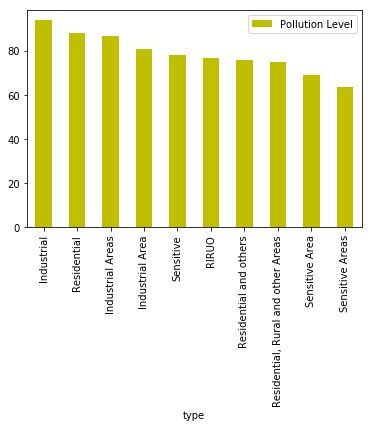

In [35]:
data[['Pollution Level','type']].groupby(["type"]).median().sort_values(by='Pollution Level',ascending=False).head(10).plot.bar(color='y')
plt.show()

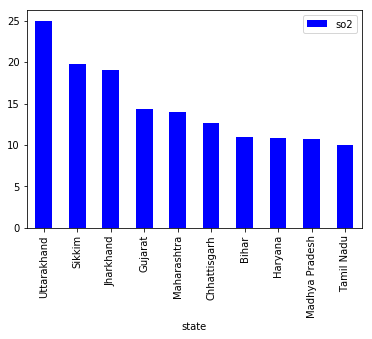

In [33]:
data[['so2','state']].groupby(["state"]).median().sort_values(by='so2',ascending=False).head(10).plot.bar(color='b')
plt.show()

**TOP 10**

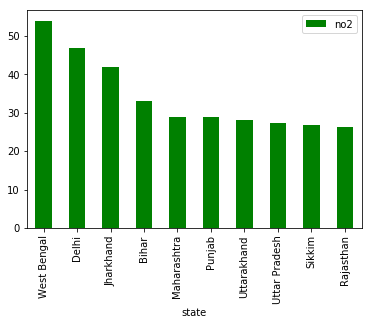

In [32]:
data[['no2','state']].groupby(["state"]).median().sort_values(by='no2',ascending=False).head(10).plot.bar(color='g')
plt.show()

**TOP 10 state affected by rspm**

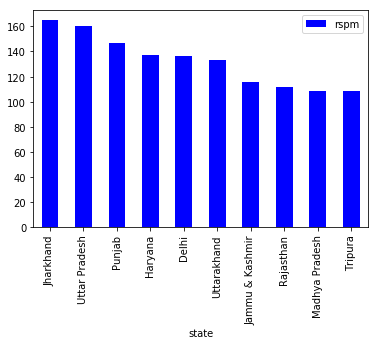

In [40]:
data[['rspm','state']].groupby(["state"]).median().sort_values(by='rspm',ascending=False).head(10).plot.bar(color='b')
plt.show()

**TOP 10 state affected by spm**

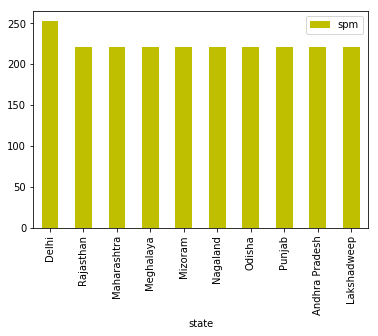

In [41]:
data[['spm','state']].groupby(["state"]).median().sort_values(by='spm',ascending=False).head(10).plot.bar(color='y')
plt.show()

**Are Polluted City more developed**

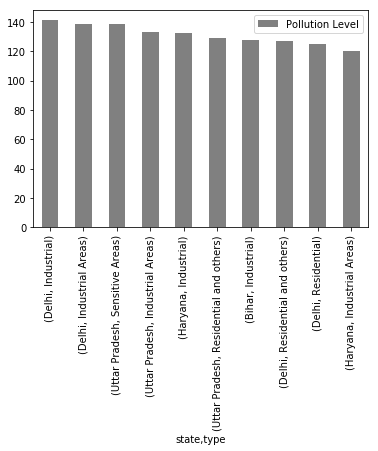

In [47]:
data[['Pollution Level','state','type']].groupby(["state","type"]).median().sort_values(by='Pollution Level',ascending=False).head(10).plot.bar(color='gray')
plt.show()